In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('wb_data.csv')

In [3]:
df.head()

,Country,BCA,BCA_NGDPD,GGR_NGDP,GGXCNL_NGDP,GGXONLB_NGDP,GGXWDG_NGDP,GGX_NGDP,LE,LP,...,NGDPRPC,NGDPRPPPPC,NGDP_D,NGDP_FY,NGDP_RPCH,PCPI,PCPIPCH,PPPGDP,PPPPC,PPPSH
0,Afghanistan,2.247,11.157,25.694,-2.243,-2.206,7.397,27.937,0.000,32.941,...,39127.08,2328.76,120.050,1547.290,-2.351,120.671,5.607,80.912,2456.29,0.061
1,Albania,-1.315,-8.677,25.905,-6.713,-4.621,75.927,32.619,0.000,2.878,...,280984.50,13394.46,203.320,1644.080,-3.482,108.613,1.621,40.658,14128.00,0.031
2,Algeria,-18.711,-12.911,30.684,-11.959,-11.655,52.273,42.643,0.000,43.851,...,163208.89,10746.03,256.869,18383.800,-5.100,211.180,2.415,497.030,11334.53,0.374
3,Andorra,0.422,14.634,40.485,-2.960,0.000,46.329,43.445,0.045,0.078,...,30447.35,49728.24,106.557,2.531,-11.184,102.298,0.257,4.092,52451.57,0.003
4,Angola,0.872,1.500,20.983,-1.898,4.944,136.540,22.882,0.000,31.031,...,47219.95,6482.35,2293.820,33611.360,-5.750,431.227,22.277,212.172,6837.35,0.160


##### Data Split 1: viskas iš df, be scaling


In [46]:
# NGDPDPC - gdp_per_capita
y = df['NGDPDPC']
X = df.drop(['NGDPDPC','Country'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Data Split 2: viskas iš df, su scaling


In [47]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test


##### Data Split 3: pasirinkti feature , be scaling

In [48]:
y3 = y
X3 = df.drop(['NGDPDPC',
 'BCA',
 'Country',
 'GGR_NGDP',
 'GGXCNL_NGDP',
 'GGXONLB_NGDP',
 'GGXWDG_NGDP',
 'GGX_NGDP',
 'LP',
 'NGDP',
 'NGDPD',
 'NGDPPC',
 'NGDPRPC'], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


##### Data Split 4: pasirinkti feature, su scaling

In [49]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

## Random Forest

##### Modelio treniravimas

In [50]:
rf1 = RandomForestRegressor(random_state=42, n_estimators=500)
rf3 = RandomForestRegressor(random_state=42, n_estimators=500)

rf1.fit(X_train, y_train)
rf3.fit(X3_train, y3_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [51]:
rf1_pred = rf1.predict(X_test)
rf3_pred = rf3.predict(X3_test)

In [52]:
print('Random Forest Performance:')

print('\nall features, ve scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nselected features, be scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, rf3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, rf3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, rf3_pred))

Random Forest Performance:

all features, ve scaling:
MAE: 3640.1408634358922
RMSE: 7840.84730073683
R2_Score:  0.8270925923742529

selected features, be scaling:
MAE: 3683.5723246666603
RMSE: 8082.021766191103
R2_Score:  0.8162921820370916


#### Optimizacija 

Bus optimizuoti šie parametrai 

1. n-estimators 
2. min_samples_leaf
3. max_features
4. bootstrap

In [53]:
rf_param_grid = {'max_features': ['sqrt', 'auto'],
              'min_samples_leaf': [1, 2, 5],
              'n_estimators': [100, 1000, 5000],
             'bootstrap': [False, True]} 

In [54]:
rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)

In [55]:
rf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 1000, 5000]})

In [19]:
rf_grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 3000}

In [20]:
rf_grid.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=3000)

In [21]:
rf_grid_predictions = rf_grid.predict(X_test)

In [22]:
#rf_grid_predictions = rf_grid.predict(X_train) #

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))

MAE: 2759.4652058347847
RMSE: 5038.644271742018
R2_Score:  0.8629342462427776


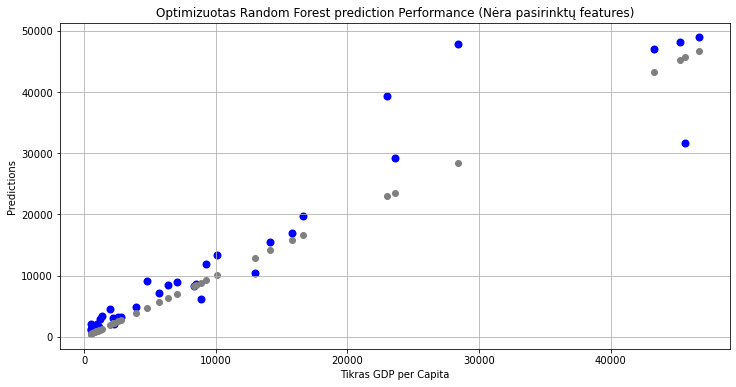

In [45]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf_grid_predictions, linewidths=2, edgecolors='b', color='blue')
plt.scatter(y_test, y_test, color='grey')
plt.xlabel('Tikras GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimizuotas Random Forest prediction Performance (Nėra pasirinktų features)') 
plt.grid()
plt.show()

